In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('superbowl.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        54 non-null     object
 1   SB          54 non-null     object
 2   Winner      54 non-null     object
 3   Winner Pts  54 non-null     int64 
 4   Loser       54 non-null     object
 5   Loser Pts   54 non-null     int64 
 6   MVP         54 non-null     object
 7   Stadium     54 non-null     object
 8   City        54 non-null     object
 9   State       54 non-null     object
dtypes: int64(2), object(8)
memory usage: 4.3+ KB


In [6]:
df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State
0,Feb 2 2020,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida
1,Feb 3 2019,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia
2,Feb 4 2018,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota
3,Feb 5 2017,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas
4,Feb 7 2016,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California


In [7]:
# Notice that mean between points number of winner is almost double of points number of loser
df.describe()

,Winner Pts,Loser Pts
count,54.000000,54.000000
mean,30.111111,16.203704
std,9.766455,7.413348
min,13.000000,3.000000
25%,23.250000,10.000000
50%,30.500000,17.000000
75%,35.000000,21.000000
max,55.000000,33.000000


In [8]:
df.drop(['SB', 'MVP', 'Stadium', 'City', 'State'], axis='columns', inplace=True)

In [9]:
df.head()

,Date,Winner,Winner Pts,Loser,Loser Pts
0,Feb 2 2020,Kansas City Chiefs,31,San Francisco 49ers,20
1,Feb 3 2019,New England Patriots,13,Los Angeles Rams,3
2,Feb 4 2018,Philadelphia Eagles,41,New England Patriots,33
3,Feb 5 2017,New England Patriots,34,Atlanta Falcons,28
4,Feb 7 2016,Denver Broncos,24,Carolina Panthers,10


In [10]:
df['Total Points'] = df['Winner Pts'] + df['Loser Pts']
df.head()

,Date,Winner,Winner Pts,Loser,Loser Pts,Total Points
0,Feb 2 2020,Kansas City Chiefs,31,San Francisco 49ers,20,51
1,Feb 3 2019,New England Patriots,13,Los Angeles Rams,3,16
2,Feb 4 2018,Philadelphia Eagles,41,New England Patriots,33,74
3,Feb 5 2017,New England Patriots,34,Atlanta Falcons,28,62
4,Feb 7 2016,Denver Broncos,24,Carolina Panthers,10,34


In [11]:
df['year'] = pd.to_numeric(df['Date'].str.slice(start=-4))
df.drop('Date', axis=1, inplace=True)
df.head()

,Winner,Winner Pts,Loser,Loser Pts,Total Points,year
0,Kansas City Chiefs,31,San Francisco 49ers,20,51,2020
1,New England Patriots,13,Los Angeles Rams,3,16,2019
2,Philadelphia Eagles,41,New England Patriots,33,74,2018
3,New England Patriots,34,Atlanta Falcons,28,62,2017
4,Denver Broncos,24,Carolina Panthers,10,34,2016


In [12]:
df['Winner'] = [x[-1] for x in df['Winner'].str.split()]
df['Winner'].head()

0      Chiefs
1    Patriots
2      Eagles
3    Patriots
4     Broncos
Name: Winner, dtype: object

In [13]:
df['Loser'] = [x[-1] for x in df['Loser'].str.split()]
df['Loser'].head()

0       49ers
1        Rams
2    Patriots
3     Falcons
4    Panthers
Name: Loser, dtype: object

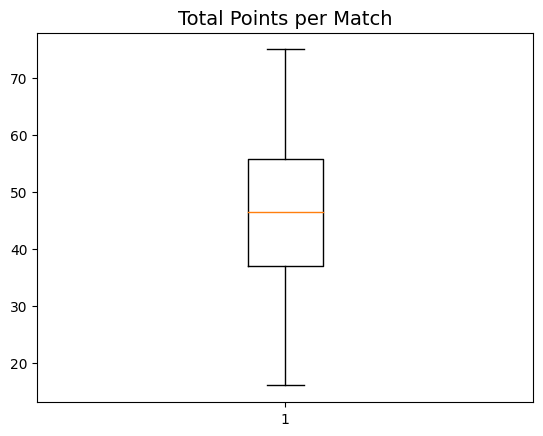

In [14]:
plt.boxplot(df['Total Points'])
plt.title("Total Points per Match", loc="center", fontsize=14)
plt.show()

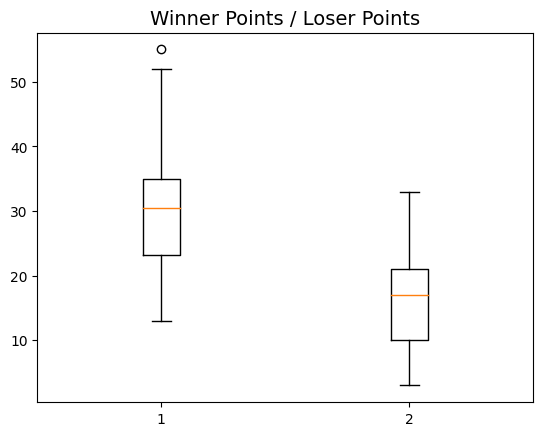

In [15]:
plt.boxplot([df["Winner Pts"], df["Loser Pts"]])
plt.title("Winner Points / Loser Points", loc="center", fontsize=14)
plt.show()

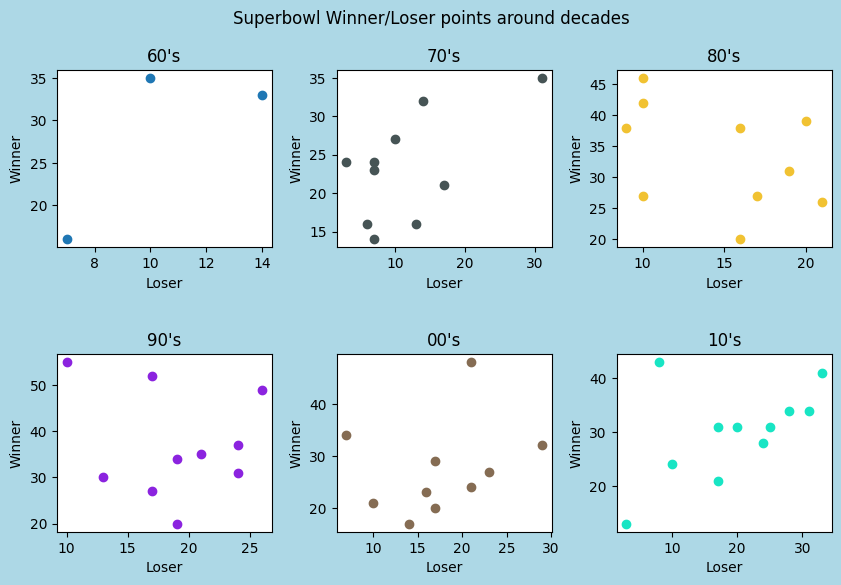

In [16]:
mosaic = """
ABC
DEF
"""

fig, ax = plt.subplot_mosaic(mosaic)
fig.set_figwidth(10)
fig.set_figheight(6)
fig.set_facecolor("lightblue")
fig.suptitle('Superbowl Winner/Loser points around decades')

ax['A'].set_title('60\'s')
ax['A'].set_ylabel('Winner')
ax['A'].set_xlabel('Loser')
ax['A'].scatter(df.loc[df['year'] < 1970]['Loser Pts'], df.loc[df['year'] < 1970]['Winner Pts'])

ax['B'].set_title('70\'s')
ax['B'].set_ylabel('Winner')
ax['B'].set_xlabel('Loser')
ax['B'].scatter(df.loc[(df['year'] >= 1970) & (df['year'] < 1980)]['Loser Pts'], df.loc[(df['year'] >= 1970) & (df['year'] < 1980)]['Winner Pts'], color='#465455')

ax['C'].set_title('80\'s')
ax['C'].set_ylabel('Winner')
ax['C'].set_xlabel('Loser')
ax['C'].scatter(df.loc[(df['year'] >= 1980) & (df['year'] < 1990)]['Loser Pts'], df.loc[(df['year'] >= 1980) & (df['year'] < 1990)]['Winner Pts'], color='#f1c232')

ax['D'].set_title('90\'s')
ax['D'].set_ylabel('Winner')
ax['D'].set_xlabel('Loser')
ax['D'].scatter(df.loc[(df['year'] >= 1990) & (df['year'] < 2000)]['Loser Pts'], df.loc[(df['year'] >= 1990) & (df['year'] < 2000)]['Winner Pts'], color='#8b23df')

ax['E'].set_title('00\'s')
ax['E'].set_ylabel('Winner')
ax['E'].set_xlabel('Loser')
ax['E'].scatter(df.loc[(df['year'] >= 2000) & (df['year'] < 2010)]['Loser Pts'], df.loc[(df['year'] >= 2000) & (df['year'] < 2010)]['Winner Pts'], color='#856c53')

ax['F'].set_title('10\'s')
ax['F'].set_ylabel('Winner')
ax['F'].set_xlabel('Loser')
ax['F'].scatter(df.loc[(df['year'] >= 2010)]['Loser Pts'], df.loc[(df['year'] >= 2010)]['Winner Pts'], color="#18e5c4")

plt.subplots_adjust(wspace=0.3, hspace=0.6)
plt.show()

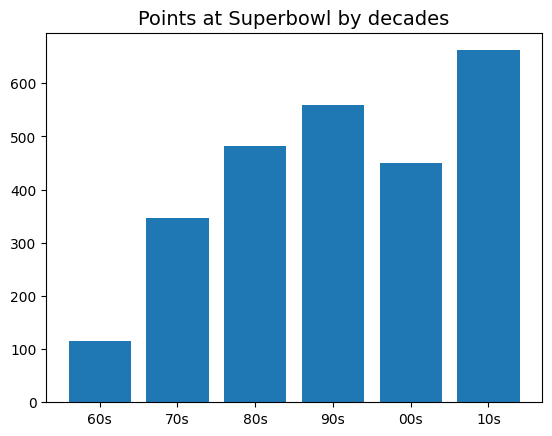

In [17]:
fig, ax = plt.subplots()
decades = ['60s', '70s', '80s', '90s', '00s', '10s']
points = [0, 0, 0, 0, 0, 0]
index = 0
for year in df['year']:
    if year < 1970:
        points[0] += df.loc[index]["Total Points"]
    if year >= 1970 and year < 1980:
        points[1] += df.loc[index]["Total Points"]
    elif year >= 1980 and year < 1990:
        points[2] += df.loc[index]["Total Points"]
    elif year >= 1990 and year < 2000:
        points[3] += df.loc[index]["Total Points"]
    elif year >= 2000 and year < 2010:
        points[4] += df.loc[index]["Total Points"]
    else:
        points[5] += df.loc[index]["Total Points"]
    index += 1

ax.bar(decades, points)
plt.title("Points at Superbowl by decades", loc="center", fontsize=14)
plt.show()

In [18]:
winners = df.groupby('Winner')['Winner'].count()
losers = df.groupby('Loser')['Loser'].count()

winners.head(), losers.head()

(Winner
 49ers         5
 Bears         1
 Broncos       3
 Buccaneers    1
 Chiefs        2
 Name: Winner, dtype: int64,
 Loser
 49ers      2
 Bears      1
 Bengals    2
 Bills      4
 Broncos    5
 Name: Loser, dtype: int64)

In [19]:
winners_group = winners.loc[winners.values > 3]
winners_group['Others'] = winners.loc[winners.values <= 3].sum()

winners_group

Winner
49ers        5
Cowboys      5
Giants       4
Packers      4
Patriots     6
Steelers     6
Others      24
Name: Winner, dtype: int64

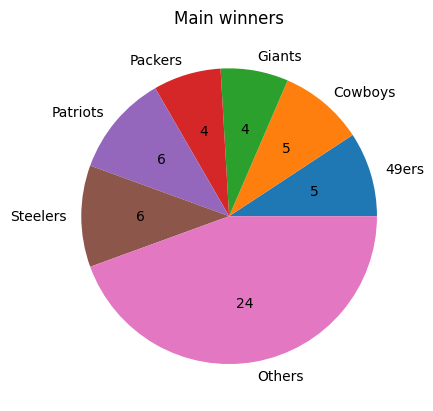

In [72]:
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute:d}"

fig, ax = plt.subplots()
ax.pie(winners_group.values, labels=winners_group.keys(), autopct=lambda pct: func(pct, winners_group.values))
ax.set_title("Main winners")
plt.show()

In [21]:
losers_group = losers.loc[losers.values > 3]
losers_group['Others'] = losers.loc[losers.values <= 3].sum()

losers_group

Loser
Bills        4
Broncos      5
Patriots     5
Vikings      4
Others      36
Name: Loser, dtype: int64

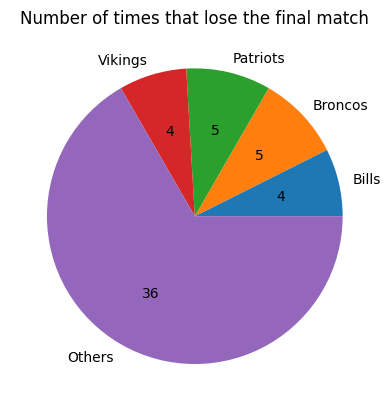

In [71]:
fig, ax = plt.subplots()
ax.pie(losers_group.values, labels=losers_group.keys(), autopct=lambda pct: func(pct, losers_group.values))
ax.set_title("Number of times that lose the final match")
plt.show()

In [41]:
superbowl = pd.concat([df['Winner'],df['Loser']])
total_appearances_superbowl = superbowl.value_counts()

total_group = total_appearances_superbowl.loc[total_appearances_superbowl.values > 5]
total_group['Others'] = total_appearances_superbowl.loc[total_appearances_superbowl.values <= 5].sum()

total_group

Patriots    11
Broncos      8
Steelers     8
Cowboys      8
49ers        7
Others      66
Name: count, dtype: int64

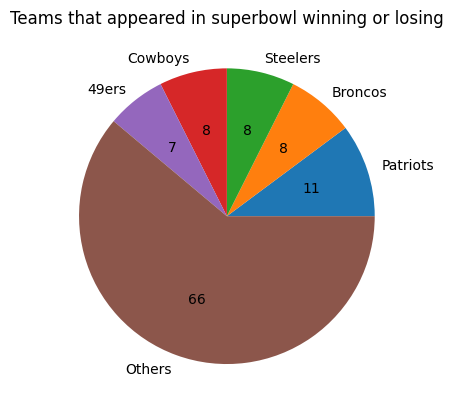

In [42]:
fig, ax = plt.subplots()
ax.pie(total_group.values, labels=total_group.keys(), autopct=lambda pct: func(pct, total_group.values))
ax.set_title("Teams that appeared in superbowl winning or losing")
plt.show()

In [43]:
total_group['Main'] = total_appearances_superbowl.loc[total_appearances_superbowl.values > 5].sum()

In [44]:
rate = total_group.iloc[-2:]
rate

Others    66
Main      42
Name: count, dtype: int64

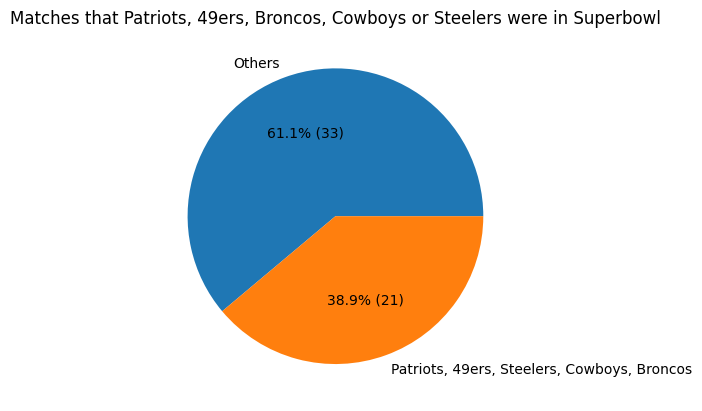

In [69]:
def func_percent(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}% ({absolute:d})"

fig, ax = plt.subplots()
labels = ['Others', 'Patriots, 49ers, Steelers, Cowboys, Broncos']
ax.pie(rate.values, labels=labels, autopct=lambda pct: func_percent(pct, rate.values/2))
ax.set_title("Matches that Patriots, 49ers, Broncos, Cowboys or Steelers were in Superbowl")
plt.show()